In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
data = pd.read_csv('..\sensex_transformed_data.csv', index_col=0)
data = data.drop(columns=['Target'])
data

,Volume,Close,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500,MACD,RSI
0,37000,3792.610107,3726.137652,3707.398215,3708.732188,3713.176797,3716.517658,3718.942305,17.017902,65.594419
1,26000,3815.310059,3743.972133,3717.675534,3712.911712,3715.199238,3717.500667,3719.327007,19.346568,68.202714
2,19800,3832.500000,3761.677707,3728.611197,3717.601449,3717.522025,3718.644939,3719.778795,20.909415,70.054109
3,26000,3765.820068,3762.506179,3732.154899,3719.492375,3718.478422,3719.114343,3719.962593,16.510298,56.348537
4,29000,3741.659912,3758.336926,3733.060138,3720.361691,3718.937461,3719.338677,3720.049209,11.280829,52.351981
...,...,...,...,...,...,...,...,...,...,...
5456,10900,84363.367188,83002.439162,82349.352752,81830.527411,81352.040260,80352.213679,76230.129737,276.890376,71.833191
5457,3400,84426.343750,83287.220079,82547.161419,81932.324130,81412.917556,80392.752287,76262.849154,293.978806,72.178588
5458,25700,84556.398438,83541.055751,82738.517325,82035.229005,81475.164703,80434.181602,76295.957135,294.142724,72.917185
5459,13600,84211.882812,83675.221163,82878.837848,82120.587978,81529.357140,80471.770669,76327.557637,252.733714,67.783603


In [4]:
features = data.drop(columns=['Close'])
target = data['Close']
features

,Volume,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500,MACD,RSI
0,37000,3726.137652,3707.398215,3708.732188,3713.176797,3716.517658,3718.942305,17.017902,65.594419
1,26000,3743.972133,3717.675534,3712.911712,3715.199238,3717.500667,3719.327007,19.346568,68.202714
2,19800,3761.677707,3728.611197,3717.601449,3717.522025,3718.644939,3719.778795,20.909415,70.054109
3,26000,3762.506179,3732.154899,3719.492375,3718.478422,3719.114343,3719.962593,16.510298,56.348537
4,29000,3758.336926,3733.060138,3720.361691,3718.937461,3719.338677,3720.049209,11.280829,52.351981
...,...,...,...,...,...,...,...,...,...
5456,10900,83002.439162,82349.352752,81830.527411,81352.040260,80352.213679,76230.129737,276.890376,71.833191
5457,3400,83287.220079,82547.161419,81932.324130,81412.917556,80392.752287,76262.849154,293.978806,72.178588
5458,25700,83541.055751,82738.517325,82035.229005,81475.164703,80434.181602,76295.957135,294.142724,72.917185
5459,13600,83675.221163,82878.837848,82120.587978,81529.357140,80471.770669,76327.557637,252.733714,67.783603


In [5]:
test_input = pd.DataFrame(features.loc[5460]).T
test_input

,Volume,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500,MACD,RSI
5460,12000.0,83895.945681,83059.790791,82224.833302,81593.70341,80514.627117,76361.295306,245.030601,71.357415


In [6]:
target_adjusted = target.shift(-1)
target_adjusted = target_adjusted.dropna()
target_adjusted

0        3815.310059
1        3832.500000
2        3765.820068
3        3741.659912
4        3806.830078
            ...     
5455    84363.367188
5456    84426.343750
5457    84556.398438
5458    84211.882812
5459    84778.843750
Name: Close, Length: 5460, dtype: float64

In [7]:
features_adjusted = features.iloc[:-1, :]
features_adjusted

,Volume,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500,MACD,RSI
0,37000,3726.137652,3707.398215,3708.732188,3713.176797,3716.517658,3718.942305,17.017902,65.594419
1,26000,3743.972133,3717.675534,3712.911712,3715.199238,3717.500667,3719.327007,19.346568,68.202714
2,19800,3761.677707,3728.611197,3717.601449,3717.522025,3718.644939,3719.778795,20.909415,70.054109
3,26000,3762.506179,3732.154899,3719.492375,3718.478422,3719.114343,3719.962593,16.510298,56.348537
4,29000,3758.336926,3733.060138,3720.361691,3718.937461,3719.338677,3720.049209,11.280829,52.351981
...,...,...,...,...,...,...,...,...,...
5455,14300,82662.207155,82137.351233,81727.146196,81291.205372,80311.900579,76197.531591,228.468113,69.540581
5456,10900,83002.439162,82349.352752,81830.527411,81352.040260,80352.213679,76230.129737,276.890376,71.833191
5457,3400,83287.220079,82547.161419,81932.324130,81412.917556,80392.752287,76262.849154,293.978806,72.178588
5458,25700,83541.055751,82738.517325,82035.229005,81475.164703,80434.181602,76295.957135,294.142724,72.917185


In [8]:
data

,Volume,Close,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500,MACD,RSI
0,37000,3792.610107,3726.137652,3707.398215,3708.732188,3713.176797,3716.517658,3718.942305,17.017902,65.594419
1,26000,3815.310059,3743.972133,3717.675534,3712.911712,3715.199238,3717.500667,3719.327007,19.346568,68.202714
2,19800,3832.500000,3761.677707,3728.611197,3717.601449,3717.522025,3718.644939,3719.778795,20.909415,70.054109
3,26000,3765.820068,3762.506179,3732.154899,3719.492375,3718.478422,3719.114343,3719.962593,16.510298,56.348537
4,29000,3741.659912,3758.336926,3733.060138,3720.361691,3718.937461,3719.338677,3720.049209,11.280829,52.351981
...,...,...,...,...,...,...,...,...,...,...
5456,10900,84363.367188,83002.439162,82349.352752,81830.527411,81352.040260,80352.213679,76230.129737,276.890376,71.833191
5457,3400,84426.343750,83287.220079,82547.161419,81932.324130,81412.917556,80392.752287,76262.849154,293.978806,72.178588
5458,25700,84556.398438,83541.055751,82738.517325,82035.229005,81475.164703,80434.181602,76295.957135,294.142724,72.917185
5459,13600,84211.882812,83675.221163,82878.837848,82120.587978,81529.357140,80471.770669,76327.557637,252.733714,67.783603


In [9]:
df_adjusted = pd.DataFrame(features_adjusted, columns=features.columns)
df_adjusted['Target'] = target_adjusted.values
df_adjusted

,Volume,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500,MACD,RSI,Target
0,37000,3726.137652,3707.398215,3708.732188,3713.176797,3716.517658,3718.942305,17.017902,65.594419,3815.310059
1,26000,3743.972133,3717.675534,3712.911712,3715.199238,3717.500667,3719.327007,19.346568,68.202714,3832.500000
2,19800,3761.677707,3728.611197,3717.601449,3717.522025,3718.644939,3719.778795,20.909415,70.054109,3765.820068
3,26000,3762.506179,3732.154899,3719.492375,3718.478422,3719.114343,3719.962593,16.510298,56.348537,3741.659912
4,29000,3758.336926,3733.060138,3720.361691,3718.937461,3719.338677,3720.049209,11.280829,52.351981,3806.830078
...,...,...,...,...,...,...,...,...,...,...
5455,14300,82662.207155,82137.351233,81727.146196,81291.205372,80311.900579,76197.531591,228.468113,69.540581,84363.367188
5456,10900,83002.439162,82349.352752,81830.527411,81352.040260,80352.213679,76230.129737,276.890376,71.833191,84426.343750
5457,3400,83287.220079,82547.161419,81932.324130,81412.917556,80392.752287,76262.849154,293.978806,72.178588,84556.398438
5458,25700,83541.055751,82738.517325,82035.229005,81475.164703,80434.181602,76295.957135,294.142724,72.917185,84211.882812


In [10]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(features_adjusted, target_adjusted, test_size=0.2)

In [11]:
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
X_train_scaled = Xscaler.fit_transform(X_train)
X_test_scaled = Xscaler.transform(X_test)

In [12]:
test = pd.DataFrame(X_train, columns=features.columns)
test['y_train'] = y_train.values
test.sort_index()

,Volume,EMA9,EMA20,EMA50,EMA100,EMA200,EMA500,MACD,RSI,y_train
0,37000,3726.137652,3707.398215,3708.732188,3713.176797,3716.517658,3718.942305,17.017902,65.594419,3815.310059
1,26000,3743.972133,3717.675534,3712.911712,3715.199238,3717.500667,3719.327007,19.346568,68.202714,3832.500000
2,19800,3761.677707,3728.611197,3717.601449,3717.522025,3718.644939,3719.778795,20.909415,70.054109,3765.820068
3,26000,3762.506179,3732.154899,3719.492375,3718.478422,3719.114343,3719.962593,16.510298,56.348537,3741.659912
4,29000,3758.336926,3733.060138,3720.361691,3718.937461,3719.338677,3720.049209,11.280829,52.351981,3806.830078
...,...,...,...,...,...,...,...,...,...,...
5455,14300,82662.207155,82137.351233,81727.146196,81291.205372,80311.900579,76197.531591,228.468113,69.540581,84363.367188
5456,10900,83002.439162,82349.352752,81830.527411,81352.040260,80352.213679,76230.129737,276.890376,71.833191,84426.343750
5457,3400,83287.220079,82547.161419,81932.324130,81412.917556,80392.752287,76262.849154,293.978806,72.178588,84556.398438
5458,25700,83541.055751,82738.517325,82035.229005,81475.164703,80434.181602,76295.957135,294.142724,72.917185,84211.882812


In [13]:
X_test_scaled

array([[-0.05609253, -0.98698383, -0.99291958, ..., -1.08928561,
         0.21765286,  0.87105541],
       [-0.06588831,  0.14108752,  0.14102734, ...,  0.1730074 ,
         1.12393164,  0.15571014],
       [-0.04367806, -1.24494913, -1.24728326, ..., -1.25723435,
        -0.2262799 , -0.0963156 ],
       ...,
       [-0.0611359 , -0.78907183, -0.79938353, ..., -0.87763716,
         0.38241411,  0.57510994],
       [-0.06365759,  1.61004373,  1.62695273, ...,  1.72090487,
         0.86202041, -0.52562983],
       [-0.06239675,  1.34126999,  1.32968311, ...,  1.33617774,
        -1.60786942,  0.31778102]], shape=(1092, 9))

In [14]:
model_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
model_regressor.fit(X_train_scaled, y_train)
predictions = model_regressor.predict(X_test_scaled)
model_regressor.score(X_test_scaled, y_test)

0.9996183180375585

In [15]:
new_input_scaled = Xscaler.transform(test_input)
new_pred = model_regressor.predict(new_input_scaled)
new_pred

array([84857.50742187])

In [16]:
y_test

625      9742.580078
3614    34101.128906
33       4134.149902
3207    28123.439453
439      6359.649902
            ...     
1034    17150.560547
4419    52578.761719
931     13934.269531
4985    64904.679688
4694    59196.988281
Name: Close, Length: 1092, dtype: float64

In [17]:
y_test_series = pd.Series(y_test, index=X_test.index)
pred_series   = pd.Series(predictions, index=X_test.index)
df2 = pd.DataFrame(pred_series, columns=['y_predicted'])
df2['y_test'] = y_test_series
df2.sort_index()

,y_predicted,y_test
8,3895.342126,3926.070068
12,4014.726226,4056.600098
15,4155.749941,4004.629883
17,4188.163032,4205.560059
23,4292.488374,4310.509766
...,...,...
5430,81643.300547,81904.703125
5446,81582.840313,81926.750000
5451,82264.762578,82029.976562
5453,82902.301641,83467.656250


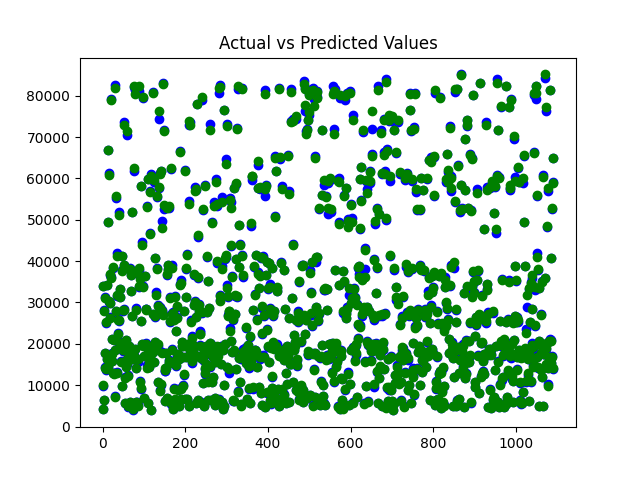

In [18]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.scatter(range(len(y_test)), y_test, color='Blue', label='Actual')
plt.scatter(range(len(predictions)), predictions, color='Green', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.show()